### Importing the required libraries and reading the dataset


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


In [2]:
data = pd.read_csv('telecom_customer_churn.csv')

In [3]:
data.shape

(7043, 38)

In [4]:
data.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


### Analysing the dataset

In [5]:
data['Customer Status'] = data['Customer Status'].replace(to_replace="Joined",
           value="Stayed")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [7]:
data.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [8]:
data.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [9]:
data.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [10]:
data = data.drop_duplicates()
data.shape

(7043, 38)

### Analysing the target variable

In [11]:
data['Customer Status'].value_counts()

Stayed     5174
Churned    1869
Name: Customer Status, dtype: int64

In [12]:
#from sklearn.preprocessing import LabelEncoder 
#le = LabelEncoder()
#data['Churn'] = le.fit_transform(data["Customer Status"])
data['Churn'] = data['Customer Status'].replace('Churned',1)
data['Churn'] = data['Churn'].replace('Stayed',0)

In [13]:
data['Churn']

0       0
1       0
2       1
3       1
4       1
       ..
7038    0
7039    1
7040    0
7041    0
7042    0
Name: Churn, Length: 7043, dtype: int64

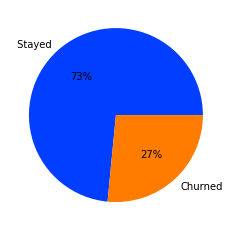

In [14]:
#data['Customer Status'].value_counts().plot(kind='pie')
palette_color = sns.color_palette('bright')
keys = [' Stayed','Churned']
plt.pie(data['Customer Status'].value_counts(), labels=keys, colors=palette_color, autopct='%.0f%%')
plt.show()

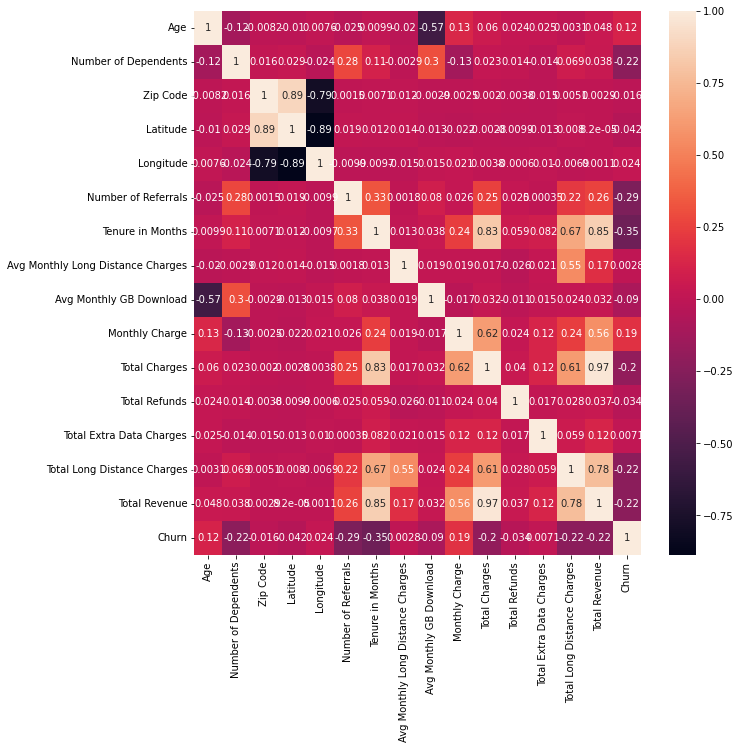

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot = True)
plt.show()

Around 1 out of 4 people are leaving the service.

In [16]:
num_corr = data.corr()['Churn']
num_corr.sort_values()

Tenure in Months                    -0.352861
Number of Referrals                 -0.286540
Total Long Distance Charges         -0.223756
Total Revenue                       -0.223003
Number of Dependents                -0.218780
Total Charges                       -0.198546
Avg Monthly GB Download             -0.090274
Latitude                            -0.041546
Total Refunds                       -0.033709
Zip Code                            -0.016289
Avg Monthly Long Distance Charges    0.002774
Total Extra Data Charges             0.007139
Longitude                            0.024052
Age                                  0.115760
Monthly Charge                       0.187833
Churn                                1.000000
Name: Churn, dtype: float64

### Analysing columns with Target Variables

#### 1) Gender

In [17]:
data["Gender"].value_counts()

Male      3555
Female    3488
Name: Gender, dtype: int64

In [18]:
a = pd.crosstab(data['Gender'],data["Customer Status"])
a['percentage'] = a.Churned/(a.Stayed+a.Churned)
a

Customer Status,Churned,Stayed,percentage
Gender,,,
Female,939,2549,0.269209
Male,930,2625,0.261603


data['index']=data.index
for i in data.columns:
    if(data[i].dtype!="object"):
        plt.figure()
        sns.scatterplot(x=i,y="Churn",data=data)
    else:
        plt.figure()
        sns.barplot(x=i,y='index',hue='Churn',data=data,estimator=sum) 

In [19]:
data.groupby(['Gender']).mean()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn
Gender,,,,,,,,,,,,,,,,
Female,46.472764,0.463016,93446.599484,36.164880,-119.727939,1.979358,32.258888,25.191581,26.475374,64.228440,2280.728842,1.924490,6.909404,739.619384,3025.333139,0.269209
Male,46.545992,0.474262,93524.797750,36.229416,-119.784887,1.924895,32.512236,25.646096,25.908141,62.975738,2280.040236,1.999165,6.812940,758.400475,3043.254487,0.261603


Gender is not helping me to find any insights.

#### 2) Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

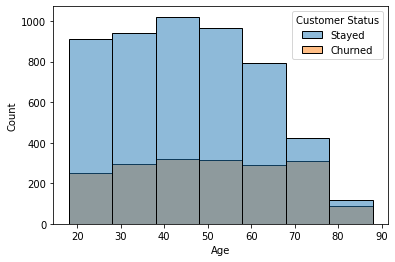

In [20]:
bins= range(18,90,10)
sns.histplot(data=data, x="Age", hue="Customer Status",bins=bins)

In [21]:
data.groupby(['Age'])['Churn'].agg(['count'])

,count
Age,
19,127
20,127
21,140
22,130
23,146
...,...
76,69
77,72
78,63


#### 3) Married

In [22]:
data['Married'].value_counts()

No     3641
Yes    3402
Name: Married, dtype: int64

<AxesSubplot:xlabel='Married'>

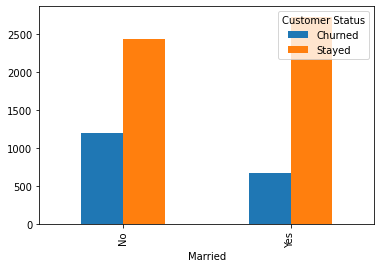

In [23]:
pd.crosstab(data['Married'],data["Customer Status"]).plot(kind='bar')

#### 4) Number of Dependents

In [24]:
data['Number of Dependents'].value_counts()

0    5416
1     553
2     531
3     517
5      10
4       9
6       3
7       2
9       1
8       1
Name: Number of Dependents, dtype: int64

In [25]:
pd.crosstab(data['Number of Dependents'] , data['Customer Status'])

Customer Status,Churned,Stayed
Number of Dependents,,
0,1763,3653
1,38,515
2,33,498
3,30,487
4,1,8
5,2,8
6,1,2
7,1,1
8,0,1


People are staying if no of dependent is high. 

In [26]:
data.drop(['City','Zip Code','Latitude','Longitude'],inplace = True,axis=1)
data.shape

(7043, 35)

In [27]:
## Replacing Nan values according to the EDA

data[['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 
           'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music','Unlimited Data']] = data[['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 
           'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music','Unlimited Data']].replace(np.nan,'No Internet')
data['Avg Monthly GB Download'] = data['Avg Monthly GB Download'].replace(np.nan,0.0)
data['Multiple Lines'] = data['Multiple Lines'].replace(np.nan,'NO phone Service')
data['Avg Monthly Long Distance Charges'] = data['Avg Monthly Long Distance Charges'].replace(np.nan,0.0)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Offer                              7043 non-null   object 
 8   Phone Service                      7043 non-null   object 
 9   Avg Monthly Long Distance Charges  7043 non-null   float64
 10  Multiple Lines                     7043 non-null   object 
 11  Internet Service                   7043 non-null   objec

#### 5) Number of Referrals

In [29]:
data['Number of Referrals'].value_counts()

0     3821
1     1086
5      264
3      255
7      248
9      238
2      236
4      236
10     223
6      221
8      213
11       2
Name: Number of Referrals, dtype: int64

In [30]:
pd.crosstab(data['Number of Referrals'] , data['Customer Status'])

Customer Status,Churned,Stayed
Number of Referrals,,
0,1245,2576
1,507,579
2,26,210
3,32,223
4,18,218
5,21,243
6,8,213
7,6,242
8,2,211


#### 6) Tenure in Months 

In [31]:
data['Tenure in Months'].value_counts(sort=True)

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: Tenure in Months, Length: 72, dtype: int64

In [32]:
pd.crosstab(data['Tenure in Months'] , data['Customer Status'])

Customer Status,Churned,Stayed
Tenure in Months,,
1,380,233
2,123,115
3,94,106
4,83,93
5,64,69
...,...,...
68,9,91
69,8,87
70,11,108


Customers who choose tenure in months high stay longer with service.

#### 7) Offer

In [33]:
data['Offer'].value_counts(sort=True)

None       3877
Offer B     824
Offer E     805
Offer D     602
Offer A     520
Offer C     415
Name: Offer, dtype: int64

In [34]:
pd.crosstab(data['Offer'] , data['Customer Status'])

Customer Status,Churned,Stayed
Offer,,
None,1051,2826
Offer A,35,485
Offer B,101,723
Offer C,95,320
Offer D,161,441
Offer E,426,379


#### 8) Internet Service

In [35]:
data['Internet Service'].value_counts()

Yes    5517
No     1526
Name: Internet Service, dtype: int64

<AxesSubplot:xlabel='Internet Service'>

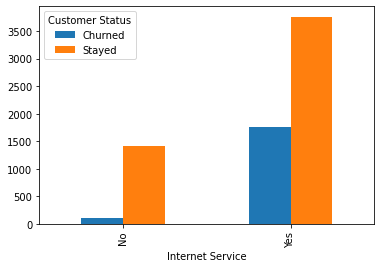

In [37]:
pd.crosstab( data['Internet Service'],data['Customer Status']).plot(kind='bar')

The people who use internet services are more likely to churn, it could be possible because of poor internet connectivity issue or better offers from others competitiors.

#### 9) Internet Type 

In [37]:
data['Internet Type'].value_counts()

Fiber Optic    3035
DSL            1652
No Internet    1526
Cable           830
Name: Internet Type, dtype: int64

<AxesSubplot:xlabel='Internet Type'>

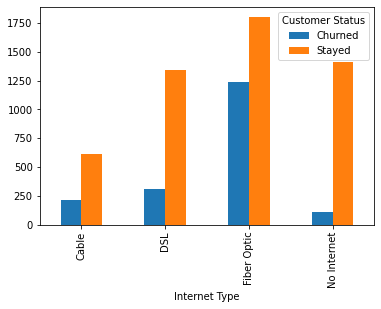

In [38]:
pd.crosstab(data['Internet Type'] , data['Customer Status']).plot(kind='bar')

#### 10) Avg Monthly GB Download

In [39]:
data['Avg Monthly GB Download'].mean()

20.515405367031093

<AxesSubplot:xlabel='Avg Monthly GB Download', ylabel='Count'>

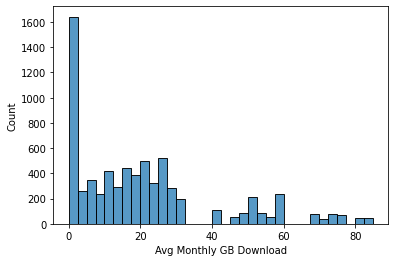

In [40]:
sns.histplot(data=data, x="Avg Monthly GB Download")

<AxesSubplot:xlabel='Avg Monthly GB Download'>

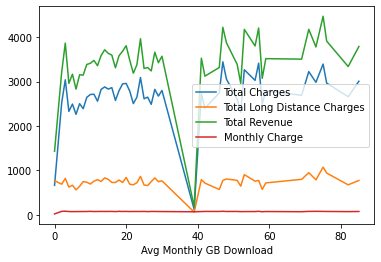

In [41]:
data.groupby(['Avg Monthly GB Download'])['Total Charges','Total Long Distance Charges','Total Revenue','Monthly Charge'].mean().plot()

<AxesSubplot:xlabel='Avg Monthly GB Download'>

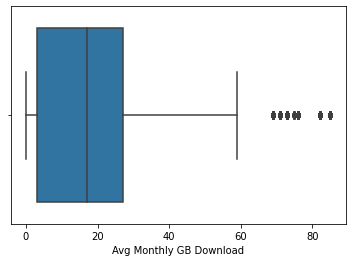

In [42]:
sns.boxplot(data['Avg Monthly GB Download'])

#### 11) Online Security

In [43]:
data['Online Security'].value_counts()

No             3498
Yes            2019
No Internet    1526
Name: Online Security, dtype: int64

<AxesSubplot:xlabel='Online Security'>

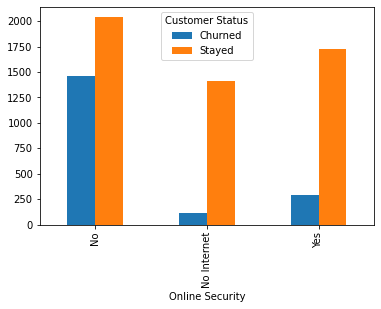

In [44]:
pd.crosstab(data['Online Security'] , data['Customer Status']).plot(kind='bar')

#### 12) Contract

In [45]:
data['Contract'].value_counts()

Month-to-Month    3610
Two Year          1883
One Year          1550
Name: Contract, dtype: int64

<AxesSubplot:xlabel='Contract'>

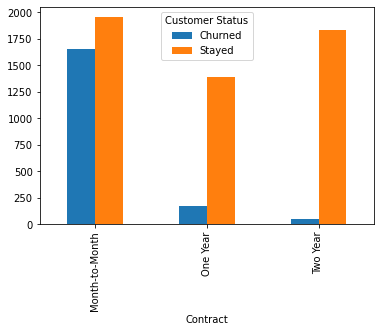

In [46]:
pd.crosstab(data['Contract'] , data['Customer Status']).plot(kind='bar')

#### 13) Paperless Billing

In [47]:
data['Paperless Billing'].value_counts()

Yes    4171
No     2872
Name: Paperless Billing, dtype: int64

<AxesSubplot:xlabel='Paperless Billing'>

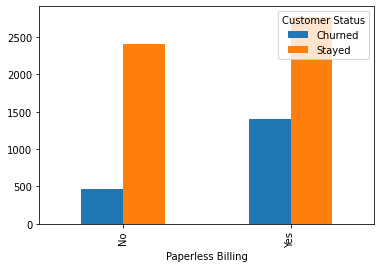

In [48]:
pd.crosstab(data['Paperless Billing'] , data['Customer Status']).plot(kind='bar')

#### 14) Payment Method

<AxesSubplot:xlabel='Payment Method'>

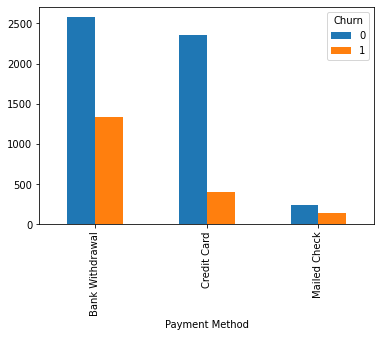

In [49]:
pd.crosstab( data['Payment Method'],data['Churn']).plot(kind='bar')

<AxesSubplot:xlabel='Payment Method', ylabel='Count'>

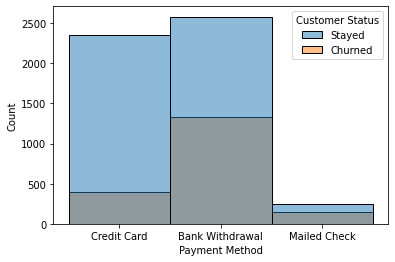

In [50]:
sns.histplot(data=data, x="Payment Method", hue="Customer Status")

In [51]:
data.groupby(['Payment Method'])['Total Charges','Total Long Distance Charges','Total Revenue','Monthly Charge'].mean()

,Total Charges,Total Long Distance Charges,Total Revenue,Monthly Charge
Payment Method,,,,
Bank Withdrawal,2480.001957,755.956667,3241.773164,71.500371
Credit Card,2175.606162,787.748858,2967.328541,54.727246
Mailed Check,1001.704545,403.506182,1407.413584,46.668571


In [52]:
#pd.crosstab( data['Payment Method'],data['Churn'])

In [53]:
grouped = data.groupby(['Payment Method'])['Total Charges'].agg(['mean'])
print(grouped)

                        mean
Payment Method              
Bank Withdrawal  2480.001957
Credit Card      2175.606162
Mailed Check     1001.704545


In [54]:
# find out sum or average of any column by their categories
data[data['Payment Method'] == "Bank Withdrawal"]['Total Charges'].sum()

9694327.65

#### 15) Monthly Charge and Total Charges

In [55]:
data[['Monthly Charge','Total Charges','Total Revenue']].describe()

,Monthly Charge,Total Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000
mean,63.596131,2280.381264,3034.379056
std,31.204743,2266.220462,2865.204542
min,-10.000000,18.800000,21.360000
25%,30.400000,400.150000,605.610000
50%,70.050000,1394.550000,2108.640000
75%,89.750000,3786.600000,4801.145000
max,118.750000,8684.800000,11979.340000


In [56]:
grouped = data.groupby(['Customer Status'])['Total Long Distance Charges'].agg(['mean'])
print(grouped)

                       mean
Customer Status            
Churned          433.917549
Stayed           862.952107


In [57]:
grouped = data.groupby(['Customer Status'])['Total Charges'].agg(['mean'])
print(grouped)

                        mean
Customer Status             
Churned          1531.796094
Stayed           2550.792103


<AxesSubplot:xlabel='Total Revenue'>

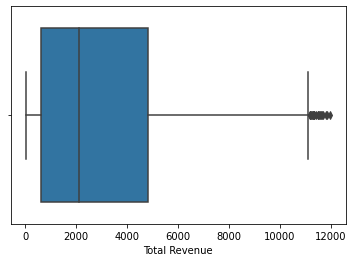

In [58]:
sns.boxplot(data['Total Revenue'])

<AxesSubplot:xlabel='Total Charges'>

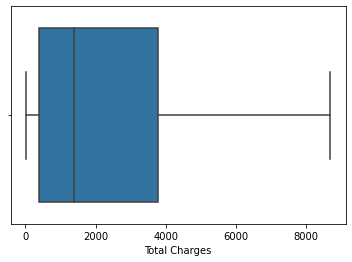

In [59]:
sns.boxplot(data['Total Charges'])

<AxesSubplot:xlabel='Monthly Charge'>

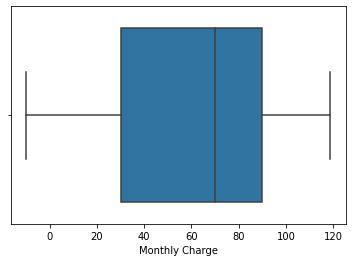

In [60]:
sns.boxplot(data['Monthly Charge'])

#### 16) Total Long Distance Charges

In [61]:
data['Total Long Distance Charges'].describe()

count    7043.000000
mean      749.099262
std       846.660055
min         0.000000
25%        70.545000
50%       401.440000
75%      1191.100000
max      3564.720000
Name: Total Long Distance Charges, dtype: float64

<AxesSubplot:xlabel='Total Long Distance Charges'>

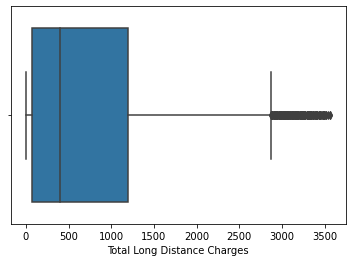

In [62]:
sns.boxplot(data['Total Long Distance Charges'])

<AxesSubplot:xlabel='Total Long Distance Charges', ylabel='Count'>

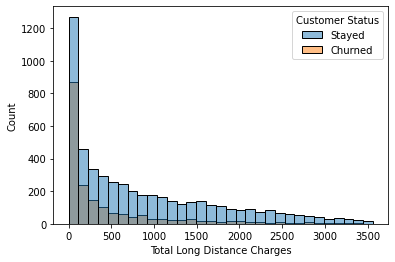

In [63]:
sns.histplot(data=data, x="Total Long Distance Charges", hue="Customer Status")

<AxesSubplot:xlabel='Monthly Charge', ylabel='Density'>

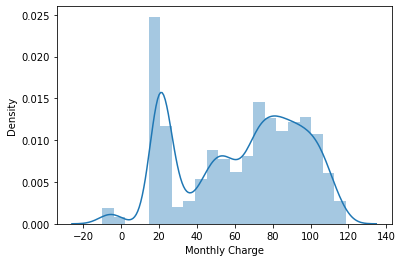

In [64]:
sns.distplot(data['Monthly Charge'],kde=True)

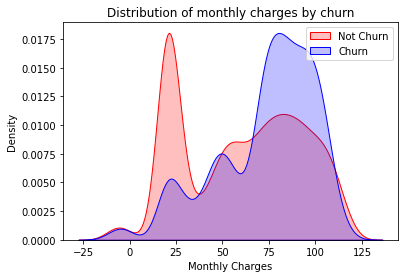

In [65]:
ax=sns.kdeplot(data['Monthly Charge'][(data["Churn"] == 0) ],
                color="Red", shade = True);
ax=sns.kdeplot(data['Monthly Charge'][(data["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

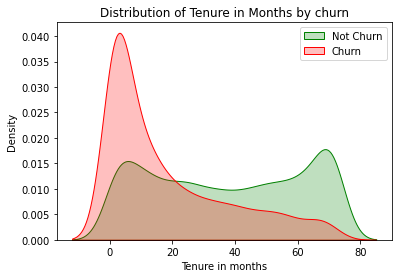

In [66]:
ax=sns.kdeplot(data['Tenure in Months'][(data["Churn"] == 0) ],
                color="Green", shade = True);
ax=sns.kdeplot(data['Tenure in Months'][(data["Churn"] == 1) ],
                ax =ax, color="Red", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Tenure in months');
ax.set_title('Distribution of Tenure in Months by churn');

In [67]:
data.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason',
       'Churn'],
      dtype='object')

In [68]:
catg_col = data.select_dtypes(include=['object']).columns
catg_col = catg_col.drop(['Customer ID','Customer Status',
       'Churn Category', 'Churn Reason'])
catg_col

Index(['Gender', 'Married', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method'],
      dtype='object')

In [69]:

for i in catg_col:
    out=data[[i,'Churn']].pivot_table(index=i,columns='Churn',aggfunc=len)
    out['percentage']=out[1]/(out[0]+out[1])
    display(out) 


Churn,0,1,percentage
Gender,,,
Female,2549,939,0.269209
Male,2625,930,0.261603


Churn,0,1,percentage
Married,,,
No,2441,1200,0.329580
Yes,2733,669,0.196649


Churn,0,1,percentage
Offer,,,
None,2826,1051,0.271086
Offer A,485,35,0.067308
Offer B,723,101,0.122573
Offer C,320,95,0.228916
Offer D,441,161,0.267442
Offer E,379,426,0.529193


Churn,0,1,percentage
Phone Service,,,
No,512,170,0.249267
Yes,4662,1699,0.267096


Churn,0,1,percentage
Multiple Lines,,,
NO phone Service,512,170,0.249267
No,2541,849,0.250442
Yes,2121,850,0.286099


Churn,0,1,percentage
Internet Service,,,
No,1413,113,0.074050
Yes,3761,1756,0.318289


Churn,0,1,percentage
Internet Type,,,
Cable,617,213,0.256627
DSL,1345,307,0.185835
Fiber Optic,1799,1236,0.407249
No Internet,1413,113,0.074050


Churn,0,1,percentage
Online Security,,,
No,2037,1461,0.417667
No Internet,1413,113,0.074050
Yes,1724,295,0.146112


Churn,0,1,percentage
Online Backup,,,
No,1855,1233,0.399288
No Internet,1413,113,0.074050
Yes,1906,523,0.215315


Churn,0,1,percentage
Device Protection Plan,,,
No,1884,1211,0.391276
No Internet,1413,113,0.074050
Yes,1877,545,0.225021


Churn,0,1,percentage
Premium Tech Support,,,
No,2027,1446,0.416355
No Internet,1413,113,0.074050
Yes,1734,310,0.151663


Churn,0,1,percentage
Streaming TV,,,
No,1868,942,0.335231
No Internet,1413,113,0.074050
Yes,1893,814,0.300702


Churn,0,1,percentage
Streaming Movies,,,
No,1847,938,0.336804
No Internet,1413,113,0.074050
Yes,1914,818,0.299414


Churn,0,1,percentage
Streaming Music,,,
No,2001,1028,0.339386
No Internet,1413,113,0.074050
Yes,1760,728,0.292605


Churn,0,1,percentage
Unlimited Data,,,
No,518,254,0.329016
No Internet,1413,113,0.074050
Yes,3243,1502,0.316544


Churn,0,1,percentage
Contract,,,
Month-to-Month,1955,1655,0.458449
One Year,1384,166,0.107097
Two Year,1835,48,0.025491


Churn,0,1,percentage
Paperless Billing,,,
No,2403,469,0.163301
Yes,2771,1400,0.335651


Churn,0,1,percentage
Payment Method,,,
Bank Withdrawal,2580,1329,0.339985
Credit Card,2351,398,0.144780
Mailed Check,243,142,0.368831


In [70]:
data = data[data['Monthly Charge']>0].reset_index()
data.shape

(6923, 36)

### Model Creation

In [71]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn import metrics

In [72]:
model_data = data.copy()
model_data.columns

Index(['index', 'Customer ID', 'Gender', 'Age', 'Married',
       'Number of Dependents', 'Number of Referrals', 'Tenure in Months',
       'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Customer Status',
       'Churn Category', 'Churn Reason', 'Churn'],
      dtype='object')

In [73]:
## dropping not required columns

model_data.drop(['index','Customer ID','Customer Status','Churn Category','Churn Reason'],axis=1,inplace=True)
model_data.shape

(6923, 31)

In [74]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6923 entries, 0 to 6922
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             6923 non-null   object 
 1   Age                                6923 non-null   int64  
 2   Married                            6923 non-null   object 
 3   Number of Dependents               6923 non-null   int64  
 4   Number of Referrals                6923 non-null   int64  
 5   Tenure in Months                   6923 non-null   int64  
 6   Offer                              6923 non-null   object 
 7   Phone Service                      6923 non-null   object 
 8   Avg Monthly Long Distance Charges  6923 non-null   float64
 9   Multiple Lines                     6923 non-null   object 
 10  Internet Service                   6923 non-null   object 
 11  Internet Type                      6923 non-null   objec

In [75]:
model_data.isnull().sum()

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges            

In [76]:
ohe = OneHotEncoder(categories='auto',drop='first',sparse=True,handle_unknown='error')
transformed = ohe.fit_transform(model_data[['Gender','Married','Offer','Phone Service','Multiple Lines',
       'Internet Service', 'Internet Type','Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music','Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method']])



In [77]:
feature_labels = ohe.get_feature_names(['Gender','Married','Offer','Phone Service','Multiple Lines',
       'Internet Service', 'Internet Type','Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music','Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method'])
feature_labels


array(['Gender_Male', 'Married_Yes', 'Offer_Offer A', 'Offer_Offer B',
       'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E',
       'Phone Service_Yes', 'Multiple Lines_No', 'Multiple Lines_Yes',
       'Internet Service_Yes', 'Internet Type_DSL',
       'Internet Type_Fiber Optic', 'Internet Type_No Internet',
       'Online Security_No Internet', 'Online Security_Yes',
       'Online Backup_No Internet', 'Online Backup_Yes',
       'Device Protection Plan_No Internet', 'Device Protection Plan_Yes',
       'Premium Tech Support_No Internet', 'Premium Tech Support_Yes',
       'Streaming TV_No Internet', 'Streaming TV_Yes',
       'Streaming Movies_No Internet', 'Streaming Movies_Yes',
       'Streaming Music_No Internet', 'Streaming Music_Yes',
       'Unlimited Data_No Internet', 'Unlimited Data_Yes',
       'Contract_One Year', 'Contract_Two Year', 'Paperless Billing_Yes',
       'Payment Method_Credit Card', 'Payment Method_Mailed Check'],
      dtype=object)

In [78]:
encoder_df = pd.DataFrame((transformed).toarray(),columns = feature_labels)
encoder_df

,Gender_Male,Married_Yes,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Phone Service_Yes,Multiple Lines_No,Multiple Lines_Yes,Internet Service_Yes,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_No Internet,Online Security_No Internet,Online Security_Yes,Online Backup_No Internet,Online Backup_Yes,Device Protection Plan_No Internet,Device Protection Plan_Yes,Premium Tech Support_No Internet,Premium Tech Support_Yes,Streaming TV_No Internet,Streaming TV_Yes,Streaming Movies_No Internet,Streaming Movies_Yes,Streaming Music_No Internet,Streaming Music_Yes,Unlimited Data_No Internet,Unlimited Data_Yes,Contract_One Year,Contract_Two Year,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6918,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
6919,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6920,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
6921,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [79]:
model_data = pd.concat([model_data,encoder_df],axis=1)

In [80]:
model_data.shape

(6923, 66)

In [81]:
model_data = model_data.drop(['Gender','Married','Offer','Phone Service','Multiple Lines',
       'Internet Service', 'Internet Type','Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music','Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method'],axis=1)
model_data.shape

(6923, 48)

In [82]:
model_data.isnull().sum()


Age                                   0
Number of Dependents                  0
Number of Referrals                   0
Tenure in Months                      0
Avg Monthly Long Distance Charges     0
Avg Monthly GB Download               0
Monthly Charge                        0
Total Charges                         0
Total Refunds                         0
Total Extra Data Charges              0
Total Long Distance Charges           0
Total Revenue                         0
Churn                                 0
Gender_Male                           0
Married_Yes                           0
Offer_Offer A                         0
Offer_Offer B                         0
Offer_Offer C                         0
Offer_Offer D                         0
Offer_Offer E                         0
Phone Service_Yes                     0
Multiple Lines_No                     0
Multiple Lines_Yes                    0
Internet Service_Yes                  0
Internet Type_DSL                     0


In [83]:
!pip install imbalanced-learn

#### Scaling

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaler = MinMaxScaler()
scaler.fit(model_data)

MinMaxScaler()

In [86]:
scaled_data = scaler.transform(model_data)

In [87]:
model_data = pd.DataFrame(scaled_data,columns=model_data.columns)

In [88]:
model_data.describe()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn,Gender_Male,Married_Yes,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Phone Service_Yes,Multiple Lines_No,Multiple Lines_Yes,Internet Service_Yes,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_No Internet,Online Security_No Internet,Online Security_Yes,Online Backup_No Internet,Online Backup_Yes,Device Protection Plan_No Internet,Device Protection Plan_Yes,Premium Tech Support_No Internet,Premium Tech Support_Yes,Streaming TV_No Internet,Streaming TV_Yes,Streaming Movies_No Internet,Streaming Movies_Yes,Streaming Music_No Internet,Streaming Music_Yes,Unlimited Data_No Internet,Unlimited Data_Yes,Contract_One Year,Contract_Two Year,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check
count,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000
mean,0.450634,0.052065,0.177340,0.442707,0.459148,0.241385,0.463108,0.261475,0.038986,0.045809,0.210404,0.252412,0.265636,0.503250,0.483461,0.074101,0.117724,0.059367,0.085657,0.114257,0.903077,0.480716,0.422360,0.783331,0.233569,0.431605,0.216669,0.216669,0.286870,0.216669,0.345226,0.216669,0.344359,0.216669,0.289759,0.216669,0.384949,0.216669,0.387982,0.216669,0.353026,0.216669,0.673841,0.219558,0.267803,0.592951,0.389715,0.054601
std,0.274502,0.106889,0.272504,0.345628,0.309133,0.240291,0.299579,0.261777,0.157938,0.167493,0.237730,0.239804,0.441703,0.500026,0.499762,0.261954,0.322304,0.236328,0.279876,0.318146,0.295875,0.499664,0.493971,0.412005,0.423132,0.495336,0.412005,0.412005,0.452333,0.412005,0.475476,0.412005,0.475193,0.412005,0.453683,0.412005,0.486618,0.412005,0.487326,0.412005,0.477945,0.412005,0.468840,0.413977,0.442846,0.491320,0.487721,0.227215
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.213115,0.000000,0.000000,0.112676,0.183837,0.035294,0.171642,0.044126,0.000000,0.000000,0.019864,0.049130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.442623,0.000000,0.000000,0.394366,0.457892,0.200000,0.518408,0.159024,0.000000,0.000000,0.112519,0.174654,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.672131,0.000000,0.272727,0.760563,0.727946,0.317647,0.712935,0.435746,0.000000,0.000000,0.335450,0.400744,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.

#### Modelling

In [89]:
Y=model_data['Churn']
Y.shape


(6923,)

In [90]:
X=model_data.drop('Churn',axis=1)
#X=model_data[colsRequired]
X.shape

(6923, 47)

#### Smoting

In [91]:
from imblearn.over_sampling import SMOTE 
from collections import Counter
sm = SMOTE(random_state=42)

In [92]:
print('Original dataset shape', Counter(Y))
x_res, y_res = sm.fit_resample(X, Y)

Original dataset shape Counter({0.0: 5084, 1.0: 1839})


In [93]:
print('Resampled dataset shape %s' % Counter(y_res))


Resampled dataset shape Counter({0.0: 5084, 1.0: 5084})


In [94]:
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size =0.20, random_state=42,stratify=y_res)

In [95]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8134, 47)
(2034, 47)
(8134,)
(2034,)


#### Logistic Regression

In [96]:
lr = LogisticRegression(C= 100.0, penalty='l2')

In [97]:
lr.fit(x_train,y_train)

LogisticRegression(C=100.0)

In [98]:
y_train_pred = lr.predict(x_train)

In [99]:
y_test_pred = lr.predict(x_test)

In [100]:
confusion_matrix(y_train,y_train_pred)

array([[3228,  839],
       [ 541, 3526]])

In [101]:
confusion_matrix(y_test,y_test_pred)

array([[787, 230],
       [146, 871]])

In [102]:
print(metrics.precision_score(y_train,y_train_pred))
print(metrics.recall_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.precision_score(y_test,y_test_pred))
print(metrics.recall_score(y_test,y_test_pred))
print(metrics.accuracy_score(y_test,y_test_pred))

0.8077892325315006
0.866978116547824
0.8303417752643226
0.7910990009082652
0.856440511307768
0.8151425762045231


In [103]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.79      0.82      4067
         1.0       0.81      0.87      0.84      4067

    accuracy                           0.83      8134
   macro avg       0.83      0.83      0.83      8134
weighted avg       0.83      0.83      0.83      8134



In [104]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.77      0.81      1017
         1.0       0.79      0.86      0.82      1017

    accuracy                           0.82      2034
   macro avg       0.82      0.82      0.81      2034
weighted avg       0.82      0.82      0.81      2034



In [105]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score



scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           ' recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}





cv = KFold(n_splits=5, random_state=1, shuffle=True)



scores = cross_validate(LogisticRegression(), x_test, y_test, scoring=scoring, cv=cv, n_jobs=-1)
# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

{'fit_time': array([0.03861761, 0.05397081, 0.0389595 , 0.04606938, 0.03702664]),
 'score_time': array([0.00865436, 0.00959611, 0.00808692, 0.00929022, 0.00630641]),
 'test_accuracy': array([0.78132678, 0.81326781, 0.81081081, 0.79115479, 0.82512315]),
 'test_precision': array([0.74774775, 0.8173516 , 0.79908676, 0.72608696, 0.81105991]),
 'test_ recall': array([0.83417085, 0.83255814, 0.84134615, 0.88359788, 0.85436893]),
 'test_f1_score': array([0.78859857, 0.82488479, 0.81967213, 0.79713604, 0.8321513 ])}

In [106]:

lr.coef_,x_train.columns

(array([[ 9.09870461e-01, -5.72478630e+00, -6.33149514e+00,
         -3.11460574e+00, -1.14822126e-01,  1.82018491e-02,
          1.21785911e+01,  1.18338455e+00, -6.32451866e-01,
          1.19417554e-02,  1.17927605e-01,  8.95536716e-01,
         -5.32254714e-02,  1.66181214e+00,  3.62893765e-01,
         -2.37037813e-01, -5.03594729e-01, -6.10433391e-01,
          2.70890452e-01, -1.90965461e+00, -8.00863474e-01,
         -1.10879113e+00, -2.35109506e-01,  2.89394745e-02,
         -2.35340381e+00,  2.58663551e-01,  2.58663551e-01,
         -9.58288603e-01,  2.58663551e-01, -7.48128872e-01,
          2.58663551e-01, -6.37486109e-01,  2.58663551e-01,
         -9.98181066e-01,  2.58663551e-01, -8.72601325e-01,
          2.58663551e-01, -1.24434585e+00,  2.58663551e-01,
          4.32209961e-01,  2.58663551e-01,  7.97894884e-02,
         -1.49432370e+00, -2.63674719e+00,  3.89420560e-01,
         -5.20497924e-01,  5.41736377e-01]]),
 Index(['Age', 'Number of Dependents', 'Number of Refe

In [107]:
features = pd.DataFrame(lr.coef_[0],index=x_train.columns,columns=['Feature_importance'])
features

,Feature_importance
Age,0.909870
Number of Dependents,-5.724786
Number of Referrals,-6.331495
Tenure in Months,-3.114606
Avg Monthly Long Distance Charges,-0.114822
Avg Monthly GB Download,0.018202
Monthly Charge,12.178591
Total Charges,1.183385
Total Refunds,-0.632452
Total Extra Data Charges,0.011942


In [108]:
plt.figure(figsize=(10,10))
feat_imp = features.sort_values(['Feature_importance'])
#feat_imp.plot(kind='barh')
#plt.show()
feat_imp

,Feature_importance
Number of Referrals,-6.331495
Number of Dependents,-5.724786
Tenure in Months,-3.114606
Contract_Two Year,-2.636747
Internet Type_Fiber Optic,-2.353404
Phone Service_Yes,-1.909655
Contract_One Year,-1.494324
Streaming Movies_Yes,-1.244346
Multiple Lines_Yes,-1.108791
Premium Tech Support_Yes,-0.998181


<Figure size 720x720 with 0 Axes>

<AxesSubplot:>

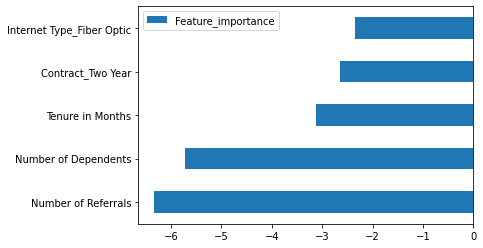

In [109]:
feat_imp[:5].plot(kind='barh')

<AxesSubplot:>

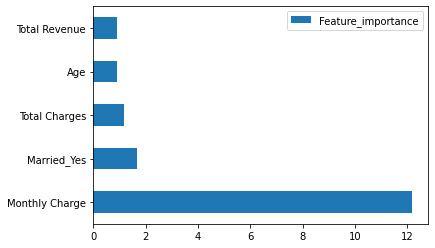

In [110]:
feat_imp[-1:-6:-1].plot(kind='barh')

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.8287431510678743


#### Decision tree classifier

In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,max_depth= 10, max_features= 0.9, min_samples_leaf= 0.01)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_features=0.9, min_samples_leaf=0.01,
                       random_state=0)

In [113]:
y_test_pred = clf.predict(x_test)
y_train_pred = clf.predict(x_train)

In [114]:
confusion_matrix(y_test,y_test_pred)

array([[834, 183],
       [190, 827]])

In [115]:
print(metrics.precision_score(y_train,y_train_pred))
print(metrics.recall_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.precision_score(y_test,y_test_pred))
print(metrics.recall_score(y_test,y_test_pred))
print(metrics.accuracy_score(y_test,y_test_pred))

0.8482255222753586
0.8286206048684535
0.8401770346692894
0.8188118811881188
0.8131760078662733
0.8166175024582104


In [116]:
print(classification_report(y_test,y_test_pred))
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.82      0.82      1017
         1.0       0.82      0.81      0.82      1017

    accuracy                           0.82      2034
   macro avg       0.82      0.82      0.82      2034
weighted avg       0.82      0.82      0.82      2034

              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84      4067
         1.0       0.85      0.83      0.84      4067

    accuracy                           0.84      8134
   macro avg       0.84      0.84      0.84      8134
weighted avg       0.84      0.84      0.84      8134



#### Random forest classifier baseline model

In [117]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [118]:
train_pred_y = rfc.predict(x_train)
test_pred_y = rfc.predict(x_test)

In [119]:
confusion_matrix(y_train,train_pred_y)

array([[4067,    0],
       [   0, 4067]])

In [120]:
confusion_matrix(y_test, test_pred_y)

array([[881, 136],
       [102, 915]])

In [121]:
print(metrics.precision_score(y_train,y_train_pred))
print(metrics.recall_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.precision_score(y_test,y_test_pred))
print(metrics.recall_score(y_test,y_test_pred))
print(metrics.accuracy_score(y_test,y_test_pred))

0.8482255222753586
0.8286206048684535
0.8401770346692894
0.8188118811881188
0.8131760078662733
0.8166175024582104


In [122]:
print(classification_report(y_train,train_pred_y))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4067
         1.0       1.00      1.00      1.00      4067

    accuracy                           1.00      8134
   macro avg       1.00      1.00      1.00      8134
weighted avg       1.00      1.00      1.00      8134



In [123]:
print(classification_report(y_test,test_pred_y))

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88      1017
         1.0       0.87      0.90      0.88      1017

    accuracy                           0.88      2034
   macro avg       0.88      0.88      0.88      2034
weighted avg       0.88      0.88      0.88      2034



In [124]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score



scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           ' recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}





cv = KFold(n_splits=5, random_state=1, shuffle=True)



scores = cross_validate(rfc, x_test, y_test, scoring=scoring, cv=cv, n_jobs=-1)
# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores

{'fit_time': array([0.30375266, 0.3216815 , 0.30998325, 0.32113314, 0.31176591]),
 'score_time': array([0.02386498, 0.02479434, 0.02438831, 0.0252459 , 0.02434611]),
 'test_accuracy': array([0.82063882, 0.83292383, 0.83783784, 0.82063882, 0.80049261]),
 'test_precision': array([0.79439252, 0.84507042, 0.83490566, 0.76363636, 0.81094527]),
 'test_ recall': array([0.85427136, 0.8372093 , 0.85096154, 0.88888889, 0.79126214]),
 'test_f1_score': array([0.82324455, 0.8411215 , 0.84285714, 0.82151589, 0.8009828 ])}

In [125]:
rfc = RandomForestClassifier(max_depth=20, min_samples_leaf=0.01, n_estimators=300)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=0.01, n_estimators=300)

In [126]:
train_pred_y = rfc.predict(x_train)
test_pred_y = rfc.predict(x_test)

In [127]:
confusion_matrix(y_train,train_pred_y)

array([[3346,  721],
       [ 594, 3473]])

In [128]:
confusion_matrix(y_test, test_pred_y)

array([[813, 204],
       [164, 853]])

In [129]:
print(metrics.precision_score(y_train,y_train_pred))
print(metrics.recall_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.precision_score(y_test,y_test_pred))
print(metrics.recall_score(y_test,y_test_pred))
print(metrics.accuracy_score(y_test,y_test_pred))

0.8482255222753586
0.8286206048684535
0.8401770346692894
0.8188118811881188
0.8131760078662733
0.8166175024582104


In [130]:
print(classification_report(y_train,train_pred_y))

              precision    recall  f1-score   support

         0.0       0.85      0.82      0.84      4067
         1.0       0.83      0.85      0.84      4067

    accuracy                           0.84      8134
   macro avg       0.84      0.84      0.84      8134
weighted avg       0.84      0.84      0.84      8134



In [131]:
print(classification_report(y_test,test_pred_y))

              precision    recall  f1-score   support

         0.0       0.83      0.80      0.82      1017
         1.0       0.81      0.84      0.82      1017

    accuracy                           0.82      2034
   macro avg       0.82      0.82      0.82      2034
weighted avg       0.82      0.82      0.82      2034



In [132]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score



scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           ' recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}





cv = KFold(n_splits=5, random_state=1, shuffle=True)



scores = cross_validate(rfc, x_test, y_test, scoring=scoring, cv=cv, n_jobs=-1)
# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores

{'fit_time': array([0.73053241, 0.71772671, 0.73777413, 0.70910883, 0.71748567]),
 'score_time': array([0.05274844, 0.05380917, 0.06062484, 0.05268192, 0.05177188]),
 'test_accuracy': array([0.79361179, 0.82063882, 0.8034398 , 0.81326781, 0.8226601 ]),
 'test_precision': array([0.74468085, 0.83809524, 0.81067961, 0.75336323, 0.81603774]),
 'test_ recall': array([0.87939698, 0.81860465, 0.80288462, 0.88888889, 0.83980583]),
 'test_f1_score': array([0.80645161, 0.82823529, 0.80676329, 0.81553398, 0.8277512 ])}

In [133]:
X.columns

Index(['Age', 'Number of Dependents', 'Number of Referrals',
       'Tenure in Months', 'Avg Monthly Long Distance Charges',
       'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Gender_Male',
       'Married_Yes', 'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C',
       'Offer_Offer D', 'Offer_Offer E', 'Phone Service_Yes',
       'Multiple Lines_No', 'Multiple Lines_Yes', 'Internet Service_Yes',
       'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_No Internet', 'Online Security_No Internet',
       'Online Security_Yes', 'Online Backup_No Internet', 'Online Backup_Yes',
       'Device Protection Plan_No Internet', 'Device Protection Plan_Yes',
       'Premium Tech Support_No Internet', 'Premium Tech Support_Yes',
       'Streaming TV_No Internet', 'Streaming TV_Yes',
       'Streaming Movies_No Internet', 'Streaming Movies_Yes',
       

In [134]:
rf_reg_best = rfc.feature_importances_

#col_names = df.drop(columns=["PM2.5"]).columns
fi_df = pd.DataFrame(rfc.feature_importances_, index=['Age', 'Number of Dependents', 'Number of Referrals',
       'Tenure in Months', 'Avg Monthly Long Distance Charges',
       'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Gender_Male',
       'Married_Yes', 'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C',
       'Offer_Offer D', 'Offer_Offer E', 'Phone Service_Yes',
       'Multiple Lines_No', 'Multiple Lines_Yes', 'Internet Service_Yes',
       'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_No Internet', 'Online Security_No Internet',
       'Online Security_Yes', 'Online Backup_No Internet', 'Online Backup_Yes',
       'Device Protection Plan_No Internet', 'Device Protection Plan_Yes',
       'Premium Tech Support_No Internet', 'Premium Tech Support_Yes',
       'Streaming TV_No Internet', 'Streaming TV_Yes',
       'Streaming Movies_No Internet', 'Streaming Movies_Yes',
       'Streaming Music_No Internet', 'Streaming Music_Yes',
       'Unlimited Data_No Internet', 'Unlimited Data_Yes', 'Contract_One Year',
       'Contract_Two Year', 'Paperless Billing_Yes',
       'Payment Method_Credit Card', 'Payment Method_Mailed Check'], columns=["Importance"])

fi_df.sort_values("Importance", ascending=False)

,Importance
Contract_Two Year,0.125869
Number of Referrals,0.118286
Tenure in Months,0.114495
Internet Type_Fiber Optic,0.070684
Number of Dependents,0.059491
Payment Method_Credit Card,0.051586
Contract_One Year,0.050605
Total Revenue,0.045484
Premium Tech Support_Yes,0.036663
Total Charges,0.036332


In [135]:
most_imp = fi_df.sort_values("Importance", ascending=False)

most_imp.index

Index(['Contract_Two Year', 'Number of Referrals', 'Tenure in Months',
       'Internet Type_Fiber Optic', 'Number of Dependents',
       'Payment Method_Credit Card', 'Contract_One Year', 'Total Revenue',
       'Premium Tech Support_Yes', 'Total Charges', 'Monthly Charge',
       'Online Security_Yes', 'Paperless Billing_Yes',
       'Total Long Distance Charges', 'Avg Monthly GB Download',
       'Unlimited Data_No Internet', 'Premium Tech Support_No Internet',
       'Internet Service_Yes', 'Device Protection Plan_No Internet',
       'Streaming Movies_No Internet', 'Streaming Music_No Internet',
       'Internet Type_DSL', 'Online Security_No Internet',
       'Streaming TV_No Internet', 'Internet Type_No Internet',
       'Online Backup_No Internet', 'Offer_Offer E', 'Married_Yes',
       'Online Backup_Yes', 'Age', 'Avg Monthly Long Distance Charges',
       'Device Protection Plan_Yes', 'Offer_Offer B', 'Unlimited Data_Yes',
       'Streaming TV_Yes', 'Streaming Movies_Yes', 'M

In [136]:
show_woe = True
iv_bins = 10
iv_threshold = .2
target='Churn'
################################ Functions #############################################################
def iv_woe(data, target, iv_bins,iv_threshold, show_woe):
    
    #Inputs
    # data - Input Data including target variable
    # target - Target Variable name
    # iv_bins - Number of iv_bins
    # show_woe - show all the iv_bins and features
    # iv_threshold - select features with IV greater than this
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], iv_bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
# Calculate the number of events in each group (bin)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        
        # Calculate % of events in each group.
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
# Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
# Calculate WOE by taking natural log of division of %
        # of non-events and % of events
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
#         print("Information value of " + ivars + " is " +
#               str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars],
                            "IV" : [d['IV'].sum()]},
                           columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)
#Show WOE Table
#         if show_woe == True:
#             print(d)
    
    # Aggregate IV at feature level
    woeDF_v2 = pd.DataFrame(woeDF.groupby('Variable')['IV'].agg('sum'),
                            columns= ['IV']).reset_index()
#     woeDF_v3 = woeDF_v2.sort_values(['IV'], ascending = False)
#     IV_df = woeDF_v2#[woeDF_v2['IV']> iv_threshold]
#     woe_top_features = IV_df['Variable'].tolist()
#     print(woe_top_features)
#     woe_top_features_df = pd.DataFrame(woe_top_features,columns = ['Feature'])
#     woe_top_features_df['Method'] = 'Information_value'
    return woeDF_v2#newDF, woeDF,IV_df, woe_top_features_df



################################ Calculate IV #############################################################



woeDF = iv_woe(model_data,
                                              'Churn',iv_bins,iv_threshold,
                                              show_woe)
woeDF.head(n=50)



colsRequired=list(woeDF[woeDF['IV']> iv_threshold].Variable)

In [137]:

colsRequired

['Contract_One Year',
 'Contract_Two Year',
 'Device Protection Plan_No Internet',
 'Internet Service_Yes',
 'Internet Type_Fiber Optic',
 'Internet Type_No Internet',
 'Monthly Charge',
 'Number of Dependents',
 'Number of Referrals',
 'Offer_Offer E',
 'Online Backup_No Internet',
 'Online Security_No Internet',
 'Paperless Billing_Yes',
 'Payment Method_Credit Card',
 'Premium Tech Support_No Internet',
 'Streaming Movies_No Internet',
 'Streaming Music_No Internet',
 'Streaming TV_No Internet',
 'Tenure in Months',
 'Total Charges',
 'Total Long Distance Charges',
 'Total Revenue',
 'Unlimited Data_No Internet']

In [138]:
from sklearn.linear_model import LinearRegression



def sklearn_vif(exogs, data):



   # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}



   # form input data for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        X, y = data[not_exog], data[exog]



       # extract r-squared from the fit
        r_squared = LinearRegression().fit(X, y).score(X, y)



       # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif



       # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance



   # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})



    return df_vif

VIF=sklearn_vif(colsRequired, model_data)


In [139]:
VIF.sort_values('VIF')

,VIF,Tolerance
Payment Method_Credit Card,1.114011e+00,0.897657
Number of Dependents,1.119456e+00,0.893291
Paperless Billing_Yes,1.183526e+00,0.844933
Number of Referrals,1.211716e+00,0.825276
Offer_Offer E,1.234508e+00,0.810039
Contract_One Year,1.510748e+00,0.661924
Contract_Two Year,2.185911e+00,0.457475
Internet Type_Fiber Optic,3.523498e+00,0.283809
Tenure in Months,7.845098e+00,0.127468
Monthly Charge,1.113504e+01,0.089807


In [140]:
colsRequired = list(VIF[VIF.VIF <= 10].index)
colsRequired

['Contract_One Year',
 'Contract_Two Year',
 'Internet Type_Fiber Optic',
 'Number of Dependents',
 'Number of Referrals',
 'Offer_Offer E',
 'Paperless Billing_Yes',
 'Payment Method_Credit Card',
 'Tenure in Months']

#### GridSearchCV

In [141]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)

In [142]:
from sklearn.model_selection import GridSearchCV
params_dt = {'max_depth' : [2,10,5,6,15,20],
             'min_samples_leaf' : [.04,0.08,0.01,0.02,0.1,0.001],
             'max_features' : [0.3,0.6,0.9,0.1,0.001],
             'class_weight':[{0: 0.25, 1: 0.75},{0: 4, 1: 9},{0: 0.35, 1: 0.68},{0: 0, 1: 1}]
            }

grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='f1',
                       cv=13,n_jobs=-1)
grid_dt.fit(x_train,y_train)

GridSearchCV(cv=13, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': [{0: 0.25, 1: 0.75}, {0: 4, 1: 9},
                                          {0: 0.35, 1: 0.68}, {0: 0, 1: 1}],
                         'max_depth': [2, 10, 5, 6, 15, 20],
                         'max_features': [0.3, 0.6, 0.9, 0.1, 0.001],
                         'min_samples_leaf': [0.04, 0.08, 0.01, 0.02, 0.1,
                                              0.001]},
             scoring='f1')

In [143]:
best_hyperparams = grid_dt.best_params_
print('Best Hyperparameters: \n', best_hyperparams)

Best Hyperparameters: 
 {'class_weight': {0: 0.35, 1: 0.68}, 'max_depth': 10, 'max_features': 0.9, 'min_samples_leaf': 0.001}


In [144]:
best_cv_score = grid_dt.best_score_
print('Best_cv_score: \n',best_cv_score)

Best_cv_score: 
 0.8486015660145624


In [145]:
best_model = grid_dt.best_estimator_
test_acc = best_model.score(x_test,y_test)
train_acc = best_model.score(x_train,y_train)
print('test_acc :\n', test_acc,'\n' ,'train_acc:\n',train_acc)

test_acc :
 0.8171091445427728 
 train_acc:
 0.8749692648143594


In [146]:
######## random forest classifier

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf= RandomForestClassifier(random_state=42)

In [148]:

params_dt = {'n_estimators':[100,300,10,500],
             'max_depth' : [20,11,25,2,16],
             'min_samples_leaf' : [.04,0.01,0.009,0.9],
             'class_weight':[{0: 0.25, 1: 0.75},{0: 4, 1: 9},{0: 0.35, 1: 0.68},{0: 39, 1: 82}]
            }

grid_dt = GridSearchCV(estimator=rf,
                       param_grid=params_dt,
                       scoring='f1',
                       cv=5,n_jobs=-1)
grid_dt.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [{0: 0.25, 1: 0.75}, {0: 4, 1: 9},
                                          {0: 0.35, 1: 0.68}, {0: 39, 1: 82}],
                         'max_depth': [20, 11, 25, 2, 16],
                         'min_samples_leaf': [0.04, 0.01, 0.009, 0.9],
                         'n_estimators': [100, 300, 10, 500]},
             scoring='f1')

In [149]:
best_hyperparams = grid_dt.best_params_
print('Best Hyperparameters: \n', best_hyperparams)

Best Hyperparameters: 
 {'class_weight': {0: 0.35, 1: 0.68}, 'max_depth': 11, 'min_samples_leaf': 0.009, 'n_estimators': 500}


In [150]:
best_cv_score = grid_dt.best_score_
print('Best_cv_score: \n',best_cv_score)

Best_cv_score: 
 0.833349134694493


In [151]:
best_model = grid_dt.best_estimator_
test_acc = best_model.score(x_test,y_test)
train_acc = best_model.score(x_train,y_train)
print('test_acc :\n', test_acc,'\n' ,'train_acc:\n',train_acc)

test_acc :
 0.8102261553588987 
 train_acc:
 0.8182935824932382


#### RFE and Stacking

In [152]:
X.drop(['Total Charges', 'Total Revenue'],axis=1,inplace=True)

In [153]:
#rfe
from sklearn.feature_selection import RFE
estimator =dt


In [154]:
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, Y)
mask = selector.ranking_
mask

array([ 1,  6,  4,  5,  1,  2,  1, 16,  8,  1, 13, 19, 36, 26, 29, 25, 18,
       30, 14, 20, 38, 22, 27, 41, 40,  9, 39, 17, 31, 28, 33, 10, 32, 23,
       34, 12, 35, 15, 37, 24,  3,  1, 11,  7, 21])

In [155]:
columns = (mask==1) 

In [156]:
columns

array([ True, False, False, False,  True, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False])

In [157]:
colsrequired=X.columns[columns]
colsrequired

Index(['Age', 'Avg Monthly Long Distance Charges', 'Monthly Charge',
       'Total Long Distance Charges', 'Contract_Two Year'],
      dtype='object')

In [158]:
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [171]:
estimators = [('lr',LogisticRegression(C= 100.0, penalty='l2')),
                ('rfc',RandomForestClassifier(class_weight= {0: 0.35, 1: 0.68},max_depth=11, min_samples_leaf=0.009, n_estimators=500)),
                  ('dt',DecisionTreeClassifier(class_weight= {0: 0.35, 1: 0.68},max_depth= 10, max_features= 0.9, min_samples_leaf= 0.001))]
             
                        


In [174]:
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(),scoring='f1')

TypeError: __init__() got an unexpected keyword argument 'scoring'

In [173]:
clf.fit(x_train, y_train).score(x_test, y_test)

0.8421828908554573

In [162]:

from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# Create Base Learners
base_learners = [
                 ('rf_1', RandomForestClassifier(n_estimators=10, random_state=42)),
                 ('rf_2', KNeighborsClassifier(n_neighbors=5))             
                ]

# Initialize Stacking Classifier with the Meta Learner
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Extract score
clf.fit(x_train, y_train).score(x_test, y_test)

0.8795476892822025

In [163]:
clf = StackingClassifier(estimators=base_learners,
                         final_estimator=LogisticRegression(),  
                         cv=10)

In [164]:
clf.fit(x_train, y_train).score(x_test, y_test)

0.8795476892822025

In [165]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(), cv=loo)

In [167]:
clf.fit(x_train, y_train).score(x_test, y_test)

KeyboardInterrupt: 

In [ ]:

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier



# Create Learners per layer
layer_one_estimators = [
                        ('rf_1', RandomForestClassifier(n_estimators=10, random_state=42)),
                        ('knn_1', KNeighborsClassifier(n_neighbors=5))             
                       ]
layer_two_estimators = [
                        ('dt_2', DecisionTreeClassifier()),
                        ('rf_2', RandomForestClassifier(n_estimators=50, random_state=42)),
                       ]
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=LogisticRegression())

# Create Final model by 
clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)

clf.fit(X_train, y_train).score(X_test, y_test)

In [ ]:
X

In [ ]:
Y

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTEENN 

print('Original dataset shape %s' % Counter(Y))
sme = SMOTEENN(random_state=42)
x_res, y_res = sme.fit_resample(X, Y)
print('Resampled dataset shape %s' % Counter(y_res))


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size =0.20, random_state=42,stratify=y_res)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_test,y_test, test_size =0.20, random_state=42)

In [ ]:
print("X_train shape: {}".format(x_train.shape))
print("X_test shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(x_val.shape))
print("y_val shape: {}".format(y_val.shape))

In [ ]:
rfc = RandomForestClassifier(max_depth=20, min_samples_leaf=0.01, n_estimators=300)
rfc.fit(x_train, y_train)

In [ ]:
train_pred_y = rfc.predict(x_train)
test_pred_y = rfc.predict(x_test)
val_pred_y = rfc.predict(x_val)

In [ ]:
confusion_matrix(y_train,train_pred_y)

In [ ]:
confusion_matrix(y_test, test_pred_y)

In [ ]:
confusion_matrix(y_val, val_pred_y)

In [ ]:
print(classification_report(y_train,train_pred_y))

In [ ]:
print(classification_report(y_test,test_pred_y))

In [ ]:
print(classification_report(y_val,val_pred_y))

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score



scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           ' recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}





cv = KFold(n_splits=5, random_state=1, shuffle=True)



scores = cross_validate(rfc, x_test, y_test, scoring=scoring, cv=cv, n_jobs=-1)
# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores